In [47]:
# import all the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from matplotlib.pyplot import figure

from wordcloud import WordCloud

%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (12, 8) 

In [2]:
# read the dataframe and view it

movies = pd.read_csv("movies.csv", parse_dates = True)
movies.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


DATA CLEANING!!!

In [3]:
# check for missing data using a loop

for col in movies.columns:
    pct_missing = np.mean(movies[col].isnull())
    print("{} - {}%".format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [5]:
movies.nunique()

name        7512
rating        12
genre         19
year          41
released    3414
score         72
votes        936
director    2949
writer      4535
star        2814
country       59
budget       413
gross       7472
company     2385
runtime      138
dtype: int64

In [6]:
# changing the datatype of the rating, genre and country columns from object to category
# this is to save space

movies["rating"] = movies["rating"].astype("category")
movies["genre"] = movies["genre"].astype("category")
movies["country"] = movies["country"].astype("category")

In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   name      7668 non-null   object  
 1   rating    7591 non-null   category
 2   genre     7668 non-null   category
 3   year      7668 non-null   int64   
 4   released  7666 non-null   object  
 5   score     7665 non-null   float64 
 6   votes     7665 non-null   float64 
 7   director  7668 non-null   object  
 8   writer    7665 non-null   object  
 9   star      7667 non-null   object  
 10  country   7665 non-null   category
 11  budget    5497 non-null   float64 
 12  gross     7479 non-null   float64 
 13  company   7651 non-null   object  
 14  runtime   7664 non-null   float64 
dtypes: category(3), float64(5), int64(1), object(6)
memory usage: 745.1+ KB


In [8]:
# filling in the empty cells in the gross and budget columns with '0'

movies["gross"] = movies["gross"].fillna(0)
movies["budget"] = movies["budget"].fillna(0)

In [9]:
# lets change the datatype of the budget and gross columns from float to int64

movies["gross"] = movies["gross"].astype("int64")
movies["budget"] = movies["budget"].astype("int64")

In [10]:
movies.head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0


In [11]:
# dropping all duplicates

movies = movies.drop_duplicates()

movies.head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0


CORELLATION ANALYSIS AND VISUALIZATIONS 

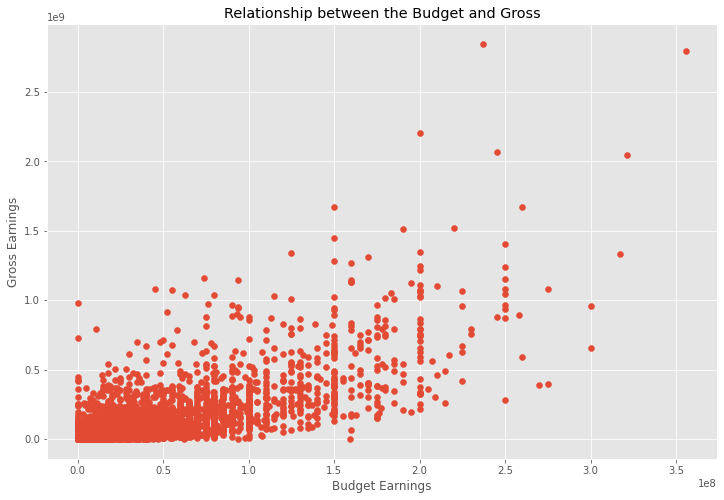

In [12]:
# relationship betwee budget and gross

plt.scatter(x = movies["budget"], y = movies["gross"])
plt.title("Relationship between the Budget and Gross")
plt.xlabel("Budget Earnings")
plt.ylabel("Gross Earnings")

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

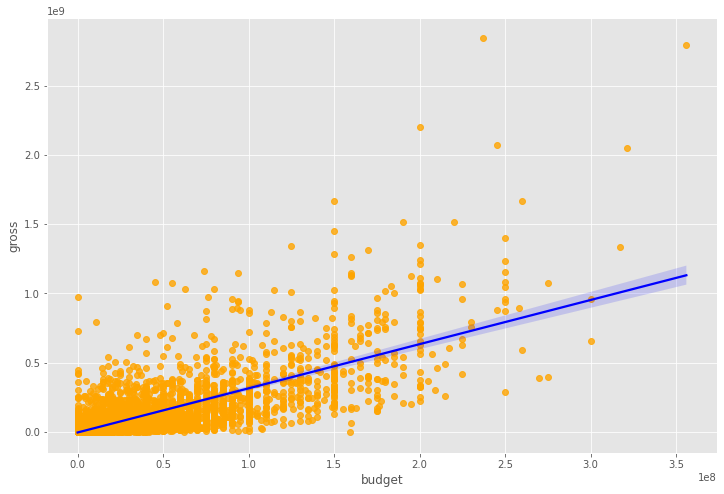

In [13]:
# using a reg plot to further visualize the relationship between the budget and the gross columns 

sns.regplot(x = "budget", y = "gross", data = movies, scatter_kws = {"color": "orange"}, line_kws = {"color": "blue"})

There is a POSITIVE relationship between the budget and the gross

In [14]:
# now for the relationship between all the numerical columns in the movies dataframe

correlation_matrix = movies.corr()

correlation_matrix

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.261900,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.632834,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.750157,0.269510
gross,0.261900,0.186392,0.632834,0.750157,1.000000,0.245235
runtime,0.120811,0.399451,0.309212,0.269510,0.245235,1.000000


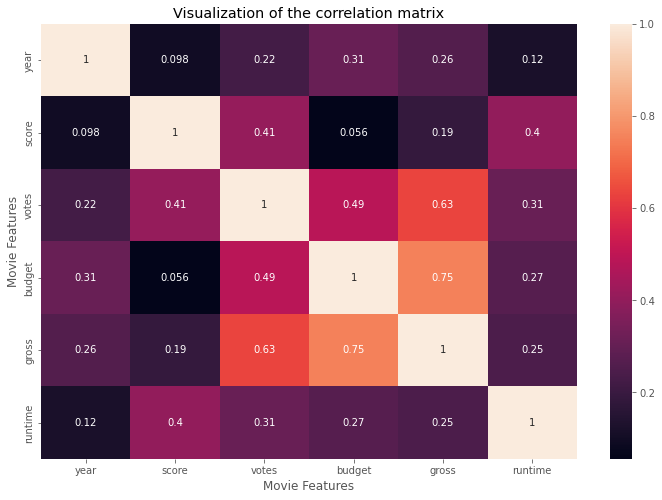

In [15]:
# visualizing it for easier understanding 

sns.heatmap(correlation_matrix, annot = True)
plt.title("Visualization of the correlation matrix")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")

plt.show()

Budget and gross votes has the highest relationship to gross while score has the lowest relationship to gross

Now, checking for the relationship between country, star, genre, writer and director to budget

In [16]:
# reviewing the dataframe

movies.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [17]:
# making a copy of the original dataframe

movies_copy = movies.copy()

In [18]:
# numerizing the entire dataframe 
# numerizing the columns with 'object' datatype

for col_name in movies_copy.columns:
    if(movies_copy[col_name].dtype == "object"):
        movies_copy[col_name] = movies_copy[col_name].astype("category")
        movies_copy[col_name] = movies_copy[col_name].cat.codes
        
movies_copy.head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,R,Drama,1980,1705,8.4,927000.0,2589,4014,1047,United Kingdom,19000000,46998772,2319,146.0
1,5573,R,Adventure,1980,1492,5.8,65000.0,2269,1632,327,United States,4500000,58853106,731,104.0
2,5142,PG,Action,1980,1771,8.7,1200000.0,1111,2567,1745,United States,18000000,538375067,1540,124.0


In [19]:
# numerizing the columns with 'category' datatype

for col_name in movies_copy.columns:
    if(movies_copy[col_name].dtype == "category"):
        movies_copy[col_name] = movies_copy[col_name].astype("category")
        movies_copy[col_name] = movies_copy[col_name].cat.codes
        
movies_copy.head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0


In [20]:
# The interest is only on the genre, star , director, country and budget columns so 
# drop every other column in the movies_copy dataframe 

movies_copy = movies_copy.drop(labels = ["name", "rating", "year", "released", "score", "votes", "budget", "company", "runtime"], axis = "columns")

movies_copy.head(5)

,genre,director,writer,star,country,gross
0,6,2589,4014,1047,54,46998772
1,1,2269,1632,327,55,58853106
2,0,1111,2567,1745,55,538375067
3,4,1301,2000,2246,55,83453539
4,4,1054,521,410,55,39846344


In [21]:
# assigning the correlation matrix to a variable

copy_corr = movies_copy.corr()

In [22]:
# viewinng the correlation matrix

copy_corr

,genre,director,writer,star,country,gross
genre,1.000000,-0.015258,0.006567,-0.005477,-0.037615,-0.234297
director,-0.015258,1.000000,0.299067,0.039234,0.017490,-0.014916
writer,0.006567,0.299067,1.000000,0.027245,0.015343,-0.022997
star,-0.005477,0.039234,0.027245,1.000000,-0.012998,-0.001129
country,-0.037615,0.017490,0.015343,-0.012998,1.000000,0.095325
gross,-0.234297,-0.014916,-0.022997,-0.001129,0.095325,1.000000


In [23]:
corr_pairs = copy_corr.unstack()

In [24]:
# viewing the correlation pairs

corr_pairs

genre     genre       1.000000
          director   -0.015258
          writer      0.006567
          star       -0.005477
          country    -0.037615
          gross      -0.234297
director  genre      -0.015258
          director    1.000000
          writer      0.299067
          star        0.039234
          country     0.017490
          gross      -0.014916
writer    genre       0.006567
          director    0.299067
          writer      1.000000
          star        0.027245
          country     0.015343
          gross      -0.022997
star      genre      -0.005477
          director    0.039234
          writer      0.027245
          star        1.000000
          country    -0.012998
          gross      -0.001129
country   genre      -0.037615
          director    0.017490
          writer      0.015343
          star       -0.012998
          country     1.000000
          gross       0.095325
gross     genre      -0.234297
          director   -0.014916
        

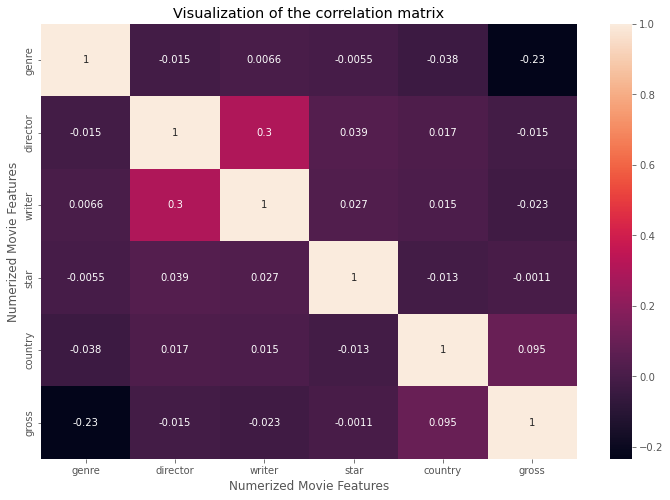

In [25]:
# visualizing the correlation pairs

sns.heatmap(copy_corr, annot = True)
plt.title("Visualization of the correlation matrix")
plt.xlabel("Numerized Movie Features")
plt.ylabel("Numerized Movie Features")

plt.show()

The country, star, writer, genre and director all have low correlation to gross 

THE EXPLORATORY DATA ANALYSIS (EDA)

In [26]:
movies.head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0


In [27]:
# using pivot table to get the 10 countries with the highest released films

country_eda = movies.pivot_table(values = "released", index = "country", aggfunc = "count")

country_eda.sort_values("released", ascending = False, inplace = True)

In [28]:
country_eda = country_eda.reset_index().head(10)

country_eda = country_eda.sort_values("released", ascending = True)

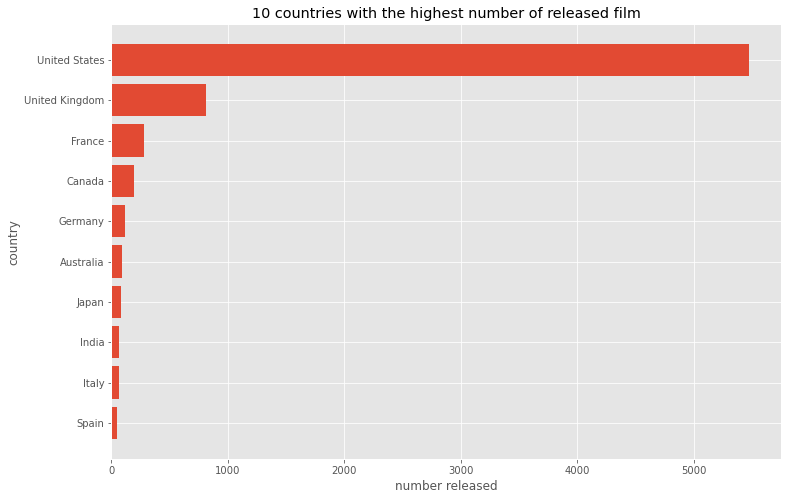

In [29]:
# the plot

plt.barh(country_eda["country"], country_eda["released"])
 
plt.ylabel("country")
 
plt.xlabel("number released")
plt.title("10 countries with the highest number of released film")
plt.show()

The country with the highest number of released films is United States

In [30]:
countries = pd.DataFrame(movies["country"].value_counts())
top_ten = pd.DataFrame(movies["country"].value_counts()).head(10)

In [31]:
top_ten_percent = ((top_ten.sum())/(countries.sum()))*100
top_ten_percent

country    94.19439
dtype: float64

The 10 countries with the most released films concentrate 94.2% of all the released films in those 30 years

In [32]:
# companies vs the amount of movies they have released and the percentage of the top 5 companies with respect to the total

movies.head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0


In [33]:
company_eda = movies.pivot_table(values = "released", index = "company", aggfunc = "count")

company_eda.sort_values("released", ascending = False, inplace = True)

In [34]:
company_eda = company_eda.reset_index().head(10)

company_eda = company_eda.sort_values("released", ascending = True)

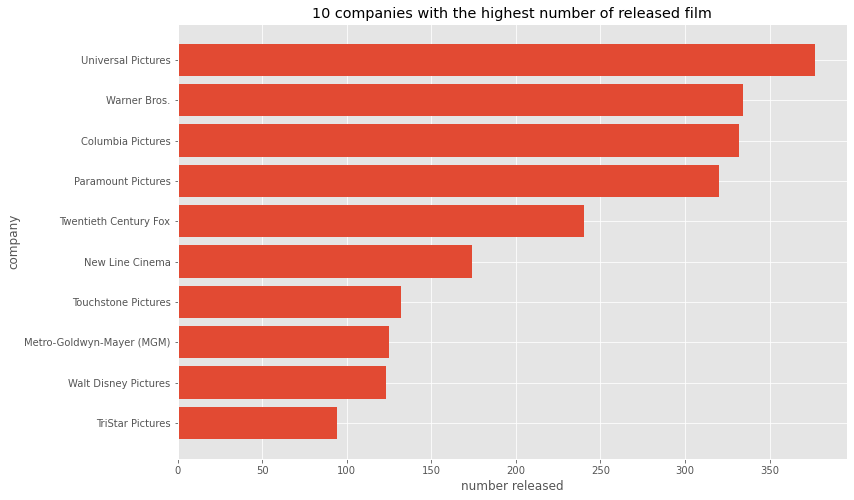

In [35]:
# the plot

plt.barh(company_eda["company"], company_eda["released"])
 
plt.ylabel("company")
 
plt.xlabel("number released")
plt.title("10 companies with the highest number of released film")
plt.show()

The country with the highest number of released films is Universal Pictures

In [36]:
companies = pd.DataFrame(movies["company"].value_counts())
top_ten_comp = pd.DataFrame(movies["company"].value_counts()).head(10)

In [37]:
top_ten_comp_percent = ((top_ten_comp.sum())/(companies.sum()))*100
top_ten_comp_percent

company    29.420991
dtype: float64

The 10 companies with the most released films concentrate 29.4% of all the released films in those 30 years

<AxesSubplot:xlabel='score', ylabel='gross'>

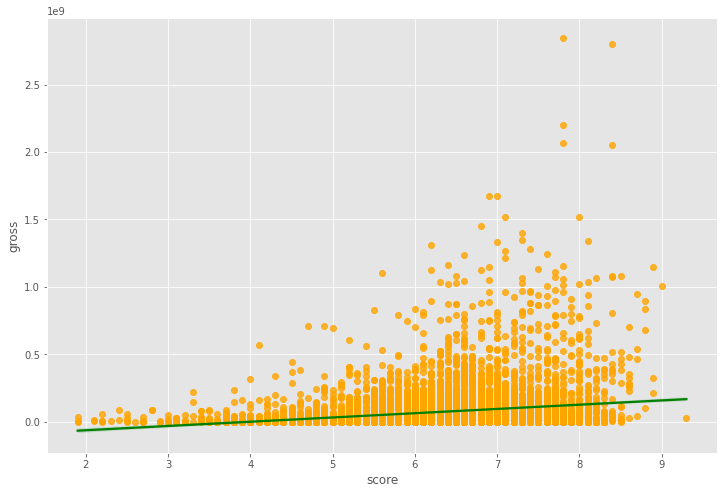

In [38]:
# is there a positive relationship between the score and the gross? 

sns.regplot(x = "score", y = "gross", data = movies, scatter_kws = {"color": "orange"}, line_kws = {"color": "green"})

There is a positive relationship between the score and the gross

In [39]:
# top 5 genres based on the score

genre_eda = movies.pivot_table(values = "score", index = "genre", aggfunc = np.mean)

genre_eda.sort_values("score", ascending = False, inplace = True)

In [40]:
genre_eda = genre_eda.reset_index().head(5)

genre_eda = genre_eda.sort_values("score", ascending = True)
genre_eda

,genre,score
4,Animation,6.769231
3,Biography,7.030926
2,Music,7.200000
1,Musical,8.050000
0,History,8.300000


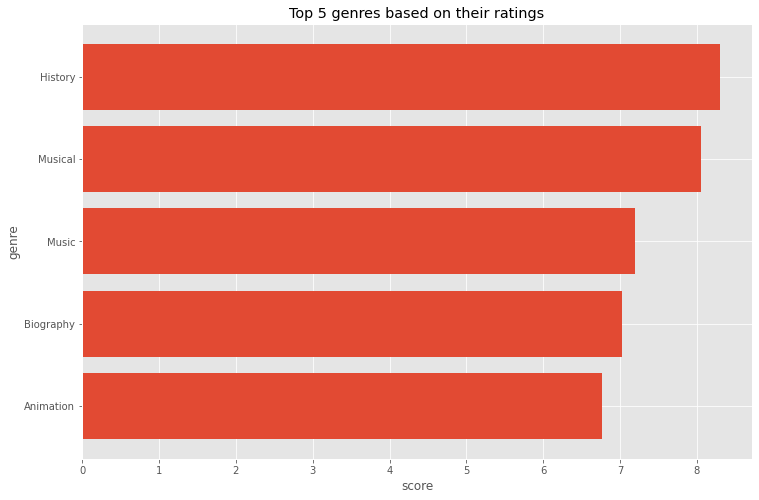

In [41]:
# the plot

plt.barh(genre_eda["genre"], genre_eda["score"])
 
plt.ylabel("genre")
 
plt.xlabel("score")
plt.title("Top 5 genres based on their ratings")
plt.show()

The history, musical and music genres have really high scores

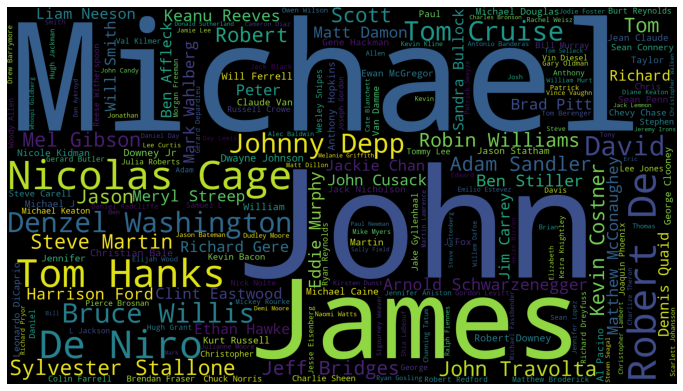

In [42]:
# word cloud for stars

plt.subplots(figsize=(12,8))
wordcloud = WordCloud(
                          background_color='Black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(str(item) for item in movies["star"]))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [43]:
# what is the movie with the highest vote? 

movies.sort_values("votes", ascending = False).head(1)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5243,The Dark Knight,PG-13,Action,2008,"July 18, 2008 (United States)",9.0,2400000.0,Christopher Nolan,Jonathan Nolan,Christian Bale,United States,185000000,1005973645,Warner Bros.,152.0


The movie with the highest number of votes is THE DARK KNIGHT with 2400000 votes and a score of 9.0